## Proposed data for the project: DC stop and frisk incidents



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
df_stop_incidents=pd.read_csv("C://Users//awele//Desktop//Aklilu_resume//DC_stop_incidents.csv",parse_dates=['REPORT_TAKEN_DATE_EST'],dayfirst=True)
df_stop_incidents.head()

,OBJECTID,INCIDENT_TYPE,REPORT_TAKEN_DATE_EST,YEAR,DATA_TYPE,SUBJECT_RACE,SUBJECT_SEX,SUBJECT_ETHNICITY,BLOCK_ADDRESS,INCIDENT_LOCATION_DISTRICT,INCIDENT_LOCATION_PSA,AGE
0,1,Stop & Frisk,2010-02-05 23:04:00+00:00,2010,Person,Black,Female,Not Hispanic Or Latino,3500 B/O EAST CAPITOL ST NE,6D,603.0,Juvenile
1,2,Stop & Frisk,2010-02-07 21:00:00+00:00,2010,Person,Black,Male,Not Hispanic Or Latino,5600 B/O 13TH ST NW,4D,403.0,Juvenile
2,3,Stop & Frisk,2010-02-08 01:00:00+00:00,2010,Person,Black,Male,Not Hispanic Or Latino,1800 B/O BENNING RD NE,5D,507.0,25
3,4,Stop & Frisk,2010-02-09 01:00:00+00:00,2010,Person,Black,Male,Not Hispanic Or Latino,1100 B/O CLIFTON ST NW,3D,304.0,Juvenile
4,5,Stop & Frisk,2010-02-09 01:00:00+00:00,2010,Person,Black,Male,Not Hispanic Or Latino,1100 B/O CLIFTON ST NW,3D,304.0,Juvenile


In [2]:
## to check get the number of records
df_stop_incidents.shape

(27559, 12)

In [3]:
## list of columns
df_stop_incidents.columns

Index(['OBJECTID', 'INCIDENT_TYPE', 'REPORT_TAKEN_DATE_EST', 'YEAR',
       'DATA_TYPE', 'SUBJECT_RACE', 'SUBJECT_SEX', 'SUBJECT_ETHNICITY',
       'BLOCK_ADDRESS', 'INCIDENT_LOCATION_DISTRICT', 'INCIDENT_LOCATION_PSA',
       'AGE'],
      dtype='object')


### Stop and frisk distribution with subject race

In [5]:
df_stop_incidents.SUBJECT_RACE.value_counts()

Black                                        22589
Unknown                                       2687
White                                         1656
Asian                                           97
American Indian Or Alaska Native                13
Native Hawaiian Or Other Pacific Islander       11
Name: SUBJECT_RACE, dtype: int64

### stop and frisk distribution with subject race: count and percentage

In [6]:
print(pd.concat([df_stop_incidents.SUBJECT_RACE.value_counts(),(df_stop_incidents.SUBJECT_RACE.value_counts()/df_stop_incidents.SUBJECT_RACE.value_counts().sum())*100],axis=1))

                                           SUBJECT_RACE  SUBJECT_RACE
Black                                             22589     83.499057
Unknown                                            2687      9.932355
White                                              1656      6.121317
Asian                                                97      0.358555
American Indian Or Alaska Native                     13      0.048054
Native Hawaiian Or Other Pacific Islander            11      0.040661


### Stop and frisk distribution a long the districs

In [8]:
print(pd.concat([df_stop_incidents.INCIDENT_LOCATION_DISTRICT.value_counts(),
(df_stop_incidents.INCIDENT_LOCATION_DISTRICT.value_counts()/df_stop_incidents.INCIDENT_LOCATION_DISTRICT.value_counts().sum())*100],axis=1))

    INCIDENT_LOCATION_DISTRICT  INCIDENT_LOCATION_DISTRICT
6D                        4474                   16.429201
7D                        4414                   16.208872
1D                        4320                   15.863690
3D                        3986                   14.637192
5D                        3843                   14.112074
4D                        3771                   13.847679
2D                        2424                    8.901293


### Stop and frisk distribution for each gender

In [9]:
print(pd.concat([df_stop_incidents.SUBJECT_SEX.value_counts(),
(df_stop_incidents.SUBJECT_SEX.value_counts()/df_stop_incidents.SUBJECT_SEX.value_counts().sum())*100],axis=1))

         SUBJECT_SEX  SUBJECT_SEX
Male           23259    85.975677
Female          2413     8.919528
Unknown         1381     5.104794


## stop and frisk distribution in subject ethinictcity

In [ ]:

print(pd.concat([df_stop_incidents.SUBJECT_ETHNICITY.value_counts(),
(df_stop_incidents.SUBJECT_ETHNICITY.value_counts()/df_stop_incidents.SUBJECT_ETHNICITY.value_counts().sum())*100],axis=1))

In [10]:
## to create month variable from the date
df_stop_incidents['month']=df_stop_incidents['REPORT_TAKEN_DATE_EST'].dt.month

In [12]:
## distribution of subjects in each year 
df_sin=df_stop_incidents.YEAR.value_counts().to_frame()
df_sin.rename(columns={"YEAR":'Count'},inplace=True)
df_sin.index.name='YEAR'
df_sin.sort_values('YEAR',inplace=True)
df_sin

,Count
YEAR,
2010,2990
2011,3375
2012,3202
2013,3339
2014,3480
2015,3197
2016,3742
2017,4234


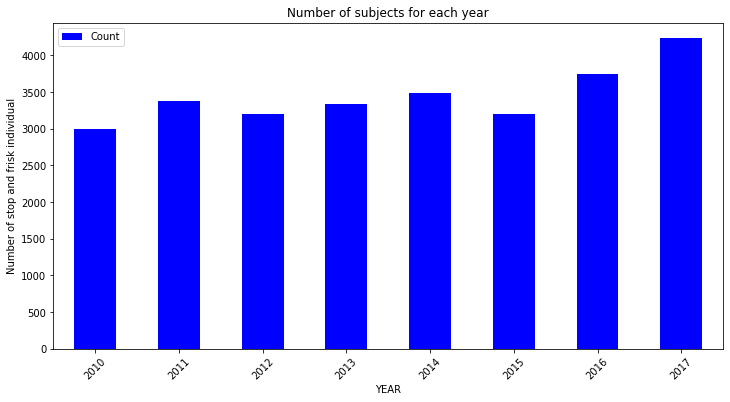

In [15]:
# To plote a bar 
df_sin.plot(kind='bar', figsize=(12, 6),color='blue',rot=45)

plt.xlabel('YEAR') # add to x-label to the plot
plt.ylabel('Number of stop and frisk individual') # add y-label to the plot
plt.title('Number of subjects for each year') # add title to the plot
plt.show()

In [16]:
## THE DISTRIBUTION OF MONTHS
df_stop_incidents['month']=df_stop_incidents['REPORT_TAKEN_DATE_EST'].dt.month
df_stop_month=df_stop_incidents.month.value_counts().to_frame()
df_stop_month.rename(columns={"month":'Count'},inplace=True)
df_stop_month.index.name='month'
df_stop_month.sort_values('month',inplace=True)
#df_stop_incidents[['month','OBJECTID']].groupby(['month']).max()
df_stop_month
month_num=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
month_w=['January','February','March','April','May','June','July','August','September','October','November','December']
for i,j in zip(month_num,month_w):
    df_stop_month['month_w']=month_w
df_stop_month.set_index('month_w',inplace=True)

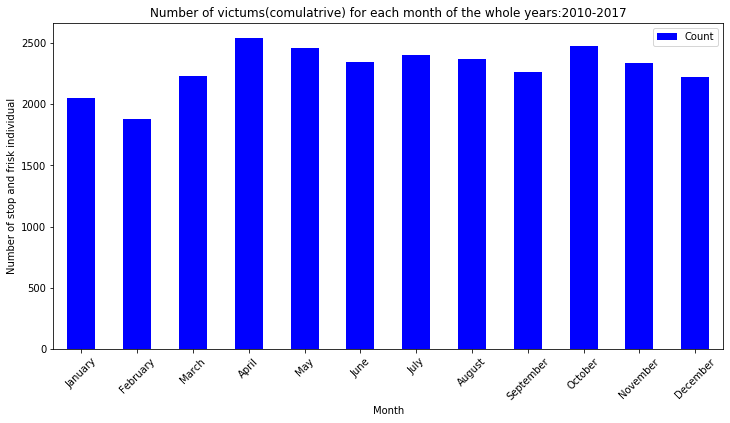

In [17]:
# To plote a bar 
df_stop_month.plot(kind='bar', figsize=(12, 6),color='blue',rot=45)

plt.xlabel('Month') # add to x-label to the plot
plt.ylabel('Number of stop and frisk individual') # add y-label to the plot
#plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],['January','February','March','April','May','June','July','August','September','October','November','December'],ha='center')
plt.title('Number of victums(comulatrive) for each month of the whole years:2010-2017') # add title to the plot
plt.show()